<a href="https://colab.research.google.com/github/alimoorreza/CS128-sp25-notes/blob/main/cs128_state_generation_with_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Suppose we modify the robot's motion update system (in a 1D line) with a Gaussian noise of the following form:
> $x_k = A x_{k-1} + a_k B + \nu_k$

where $\nu_k$ = $N(0,\Sigma)$ is Gaussian distribution with zero mean vector and covariance matrix equal to $\Sigma$

In [ ]:
import numpy as np
# Generate time stamps from 1 to 1000
total_number_of_samples = 375

t = np.array(range(1,total_number_of_samples+1))
#print(t)


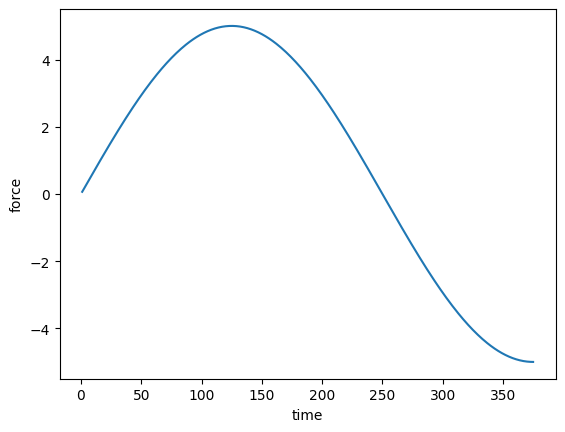

In [ ]:
# Generate a set of forces for each time step that can be exerted on the robot
# Let's assume the force is applied following a sinusoidal wave: 5*sin(2*pi*t/500)
import matplotlib.pyplot as plt
f = 5*np.sin(2*np.pi*t/500)
#print(f)
plt.plot(t, f)
plt.xlabel('time')
plt.ylabel('force')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
x                       = np.zeros((2, total_number_of_samples))
#print(x)


In [ ]:
T   = 0.1
m   = 5

# initial state vector
x0  = np.array([[0],
               [0]])


# initialize state history vectors for each time stamp
x   = np.zeros((2, total_number_of_samples))

# state transition input matrices
A   = np.array([[1, T],
              [0, 1]])
B   = np.array([[T**2 / (2 * m)],
              [T / m]])


print(f'A={A}')
print(f'B={B}')

A=[[1.  0.1]
 [0.  1. ]]
B=[[0.001]
 [0.02 ]]


In [ ]:
0.1*np.random.randn(2,1) # two 1D Gaussian noises: one for the position; another for the velocity

array([[ 0.09402492],
       [-0.22671801]])

In [ ]:
# sequential motion update for each time stamp eg, from 1 to 375
for i in range(len(t)):
    if i == 0:
        x[:, i] = (A @ x0 + B * f[i]).flatten()
    else:
        x[:, i] = (A @ x[:, i-1].reshape(2,1) + B * f[i] + 0.1*np.random.randn(2,1)).flatten()


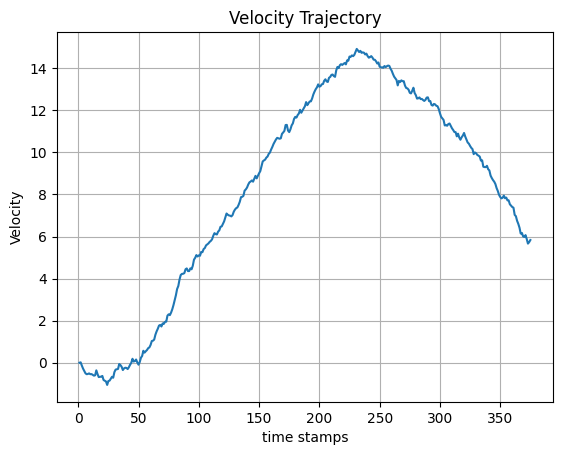

In [ ]:
# plotting velocity vs. time stamps
plt.plot(t, x[1, :])
#plt.plot(t[:50], x[1, :50])
plt.xlabel('time stamps')
plt.ylabel('Velocity')
plt.title('Velocity Trajectory')
plt.grid(True)
plt.show()

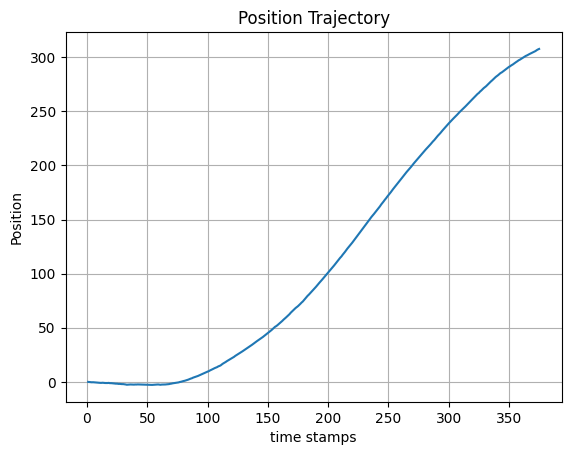

In [ ]:
# plotting position vs. time stamps
plt.plot(t, x[0, :])
#plt.plot(t[:50], x[0, :50])
plt.xlabel('time stamps')
plt.ylabel('Position')
plt.title('Position Trajectory')
plt.grid(True)
plt.show()

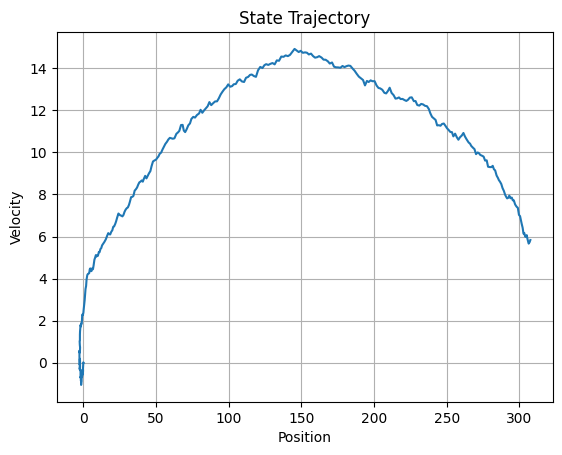

In [ ]:
# plotting position vs. velocity
plt.plot(x[0, :], x[1, :])
#plt.plot(x[0, :50], x[1, :50])
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('State Trajectory')
plt.grid(True)
plt.show()

In general, we do not get to directly observe the state $X_k$. Instead, we get some partial and corrupted version of the state. For example, suppose that our goal is to estimate the position and velocity of a robot. Then $X_k$ is a vector of this position and velocity. Suppose that the only sensor on the robot is a GPS unit. This unit will give a noisy estimate of the position and **no information at all about velocity**. We can model such situation as follows:
> $z_k = C x_{k} + \eta_k$

> $z_k = \begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix}
 x_{k} + \eta_k$

 where $\eta_k$ = $N(0,\Sigma_z)$ is Gaussian distribution with zero mean vector and covariance matrix equal to $\Sigma_z$